---
---

<h1><center><ins>Exercise Sheet 6</ins></center></h1>
<h2><center>Numerical Methods <br>

---
---

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import log

## Exercise 1 - Radioactive decay

Radioactive decay is the process by which an unstable atomic nucleus loses energy by radiation. The fundamental law of radioactive decay is based on the fact that the decay, i.e. the transition of a parent nucleus to a daughter nucleus is a purely statistical process. The disintegration (decay) probability is a fundamental property of an atomic nucleus and remains equal in time. Mathematically this law is expressed as: 

$$ \frac{d N}{dt} = - \lambda N \ , $$

where $N$ is the number of radioactive nuclei, $dN/dt$ the variation of this number per unit of time, and $\lambda$ is thus the probability of decay per nucleus per unit of time. A more intuitive representation of exponential decay is the time required for the decaying quantity to fall to one half of its initial value. This time, $t_{1/2}$, is called "half-life", and can be written in terms of the decay constant as:

$$ t_{1/2} = \frac{\ln(2)}{\lambda} \ . $$

Let's consider here Carbon-14, for which the decay constant is $\lambda \sim 1.21 \times 10^{-4}$ yr$^{-1}$, and which has a half-life $t_{1/2} \sim 5728$ yr. Its presence in organic materials is the basis of the radiocarbon dating method to date archaeological, geological and hydrogeological samples.

**(A)** Implement _**your own version**_ of the **Euler and Runge Kutta (order 2) algorithms**, and solve the differential equation above by using these methods. Compare the results you obtain to the analytic solution, which can be calculated as:

$$ N = N_0 \exp(-\lambda t) \ ,$$

where $N_0$ is the initial amount of the nuclei $[$i.e., $N(t = 0) = N_0]$.

**(B)** Compute your solution for a sufficient number of steps so that you can determine the **half-life** of Carbon-14. Pay attention to the size of the time-step you are using, and discuss your results when using different time-steps. Which method recovers a value of the half-life that is closer to the real one?

### Euler's method:

discretizes the differential equation

Taylor expansion: N(t+Δt) ≈ N(t) + Δt⋅dN/dt

dt/dN ​= −λN  =>  Nn+1 ​= Nn ​− Δt⋅λNn

(rate of decay is proportional to the number of undecayed nuclei)


### Runge Kutta method:

solution over a timestep Δt by calculating intermediate slopes (gradients) to get a more accurate result

Nn+1​ = Nn ​+ Δt/6 ​(k1​+2k2​+2k3​+k4​)

k1 ​= −λN

k2​ = −λ (Nn ​+ Δt​ /2 k1​)

k3​ = −λ (Nn ​+ Δt​ /2 k2​)

k4 ​= −λ (Nn ​+ Δt⋅k3​)

 euler: 5729,rk4: 5729


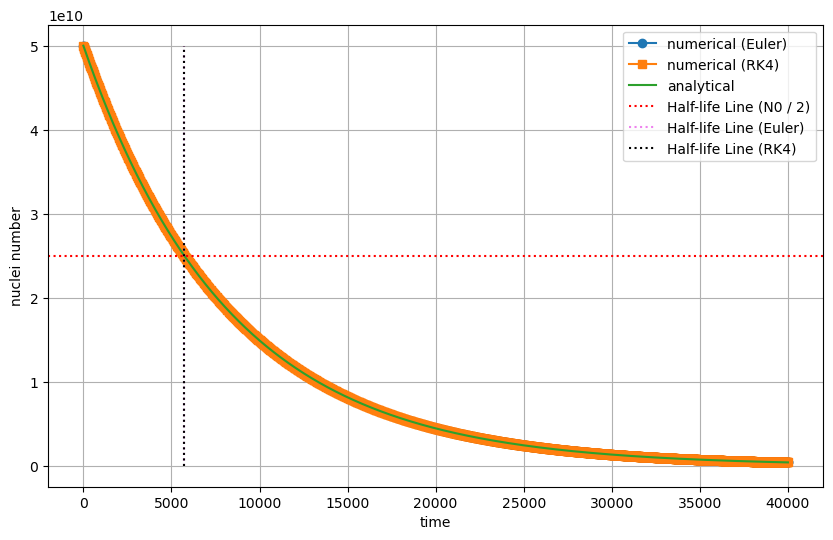

In [2]:
lamb = 1.21 * 10**(-4) #decay constant
halflife = log(2)/lamb

#parameters 
N_0 = 5*10**10 #initial condition, number of nuclei at t=0, 5*10**10 is for around 1g of carbon-14
dt = 1 #time step

time = np.arange(0, 40000, dt) #make a list from 0 end value-1 with steps as big as dt value

analytical = N_0 * np.exp(-lamb * time) #analytical solution

#euler
numerical_eu = [N_0] #initialize a list with the initial condition already inside 
for t in time[:-1]:  #loop through the time steps except the last one because the next N value is calculated based on the current one
    N_new = numerical_eu[-1] - lamb * numerical_eu[-1] * dt #take last calculated value, subtract it by rate of decay, λN, at the current time multiplied by  dt to get the total decay over one time step
                                                    #entire thing: gives the number of nuclei left after one time step
    numerical_eu.append(N_new) #put new values in the list, so they can be used for the next loop


numerical_rk = [N_0] #initialize a list with the initial condition 
for t in time[:-1]: 
    N_current = numerical_rk[-1]  #to always get the newest "updated" value of N,  new value of N is calculated based on the previous one
    
    #slopes (k1, k2, k3, k4)
    k1 = -lamb * N_current
    k2 = -lamb * (N_current + 0.5 * dt * k1)
    k3 = -lamb * (N_current + 0.5 * dt * k2)
    k4 = -lamb * (N_current + dt * k3)
    
    N_new = N_current + (dt / 6) * (k1 + 2 * k2 + 2 * k3 + k4) #actual formula
    
    numerical_rk.append(N_new)  #put value into list so they are stored and used for the next loop




#numerical half life
def half_life(method, time):
    for i, N in enumerate(method): #get the values inside the list with N and with i, the index of the list
        if N <= N_0/2:

            return time[i]

    return None


half_life_eu = half_life(numerical_eu, time)
half_life_rk = half_life(numerical_rk, time)

print(f" euler: {half_life_eu},rk4: {half_life_rk}")


#plot results for comparison with the analytical solution
plt.figure(figsize=(10, 6))
plt.plot(time, numerical_eu, label='numerical (Euler)', marker='o', markevery=10)
plt.plot(time, numerical_rk, label='numerical (RK4)', marker='s', markevery=20)
plt.plot(time, analytical, label='analytical') 
plt.axhline(N_0 / 2, color='red', linestyle=':', label='Half-life Line (N0 / 2)')

plt.vlines(half_life_eu, ymin=0, ymax=N_0, color='violet', linestyle=':', label='Half-life Line (Euler)')
plt.vlines(half_life_rk,  ymin=0, ymax=N_0, color='black', linestyle=':', label='Half-life Line (RK4)')
plt.xlabel('time')
plt.ylabel('nuclei number')
plt.legend()
plt.grid()
plt.show()


## Exercise 3 - Motion of a mass attached to a spring

The differential equation describing the motion of a particle attached to a spring can be obtained by putting together Newton's 2nd law and Hooke's law, and it can be written as:

$$ \frac{d^2 x}{dt^2} = - \frac{k}{m} x \ , $$

where $m$ is the mass of your particle, $k$ is the spring constant, and $x$ is the displacement from the equilibrium position.

**(A)** Choose some reasonable values for $k$ and $m$, define the initial conditions of your problem, and compute the analytic solution of your specific system, considering that the general solution is given by:

$$ x(t) = x_0 \cos\left(\sqrt{\frac{k}{m}} \, t\right) + v_0 \sqrt{\frac{m}{k}} \sin \left(\sqrt{\frac{k}{m}} \, t\right) \ , $$

where $x_0$ and $v_0$ are the position and velocity of the particle at time $t = 0$.

**(B)** Rewrite the above differential equation as a system of first-order differential equations, and solve it numerically _**by using one of the built-in python methods**_ (take a look at the available methods in the `scipy` package).

**(C)** Plot your solution and compare it to the analytical solution.

dx/dt ​= v  ,  dv/dt ​= −(k/m)x


will use scipy.integrate.solve_ivp , RK45 (Default) also has RK23,Radau,Backward Differentiation Formula,LSODA

You provide the function defining the system of ODEs

You specify the time span and initial conditions

You choose a method (default is RK45 if no method is specified)



The solve_ivp function returns a result object containing:

solution.y: The solution array where each row corresponds to a variable in the system:

- solution.y[0]: x(t)x(t) (displacement)

- solution.y[1]: v(t)v(t) (velocity)
        
solution.t: The time points at which the solution was evaluated.

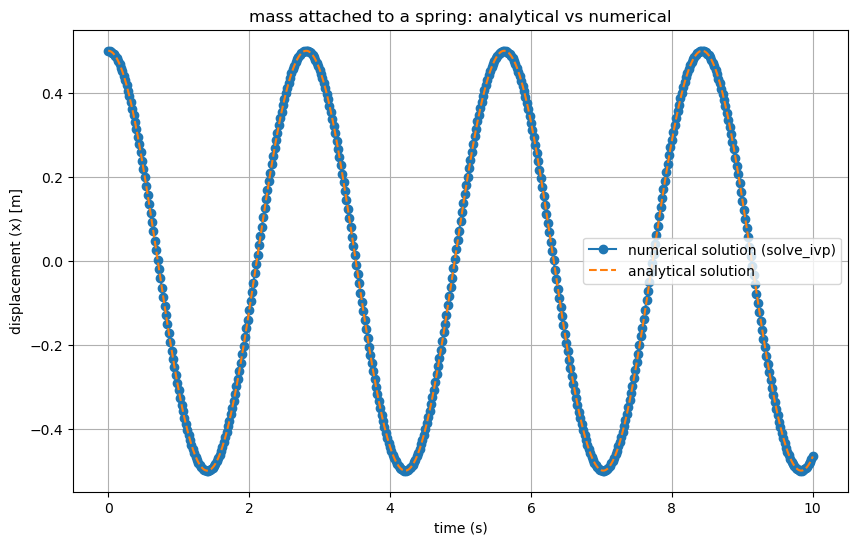

In [3]:
from scipy.integrate import solve_ivp

m = 1 #kg
k = 5 #k (N/m)
x_0 = 0.5 #initial position (m)
v_0 = 0.0 #initial velocity (m/s)
t_max = 10 #max time (s)
tau = 0.02 #time step 

time = np.arange(0, t_max+tau, tau)

alpha = np.sqrt(k / m)  #angular frequency
x_analytical = x_0 * np.cos(alpha * time) + (v_0 / alpha) * np.sin(alpha * time) #had to do v_0/alpha bc m&k are upside down


#function which the python method needs, time not used but apparently it is required-got that from chatgpt
def spring_mass(t, y, k, m):
    x, v = y #need the y to define x and v
    dxdt = v
    dvdt = -(k / m) * x
    return [dxdt, dvdt]

initial_conditions = [x_0, v_0]  #[position, velocity]
solution = solve_ivp(spring_mass, [0, t_max], initial_conditions, t_eval=time, args=(k, m))
                    #function,  time interval, initial conditions, time points, Additional Argument
                    #time points: discrete times at which the solution is evaluated.
                    #Additional Argument: passes the spring constant k and mass m to the spring_mass function.

#get solution for x
x_numerical = solution.y[0]

plt.figure(figsize=(10, 6))
plt.plot(time, x_numerical, label="numerical solution (solve_ivp)", marker="o")
plt.plot(time, x_analytical, label="analytical solution", linestyle="--")
plt.xlabel("time (s)")
plt.ylabel("displacement (x) [m]")
plt.title("mass attached to a spring: analytical vs numerical")
plt.legend()
plt.grid()
plt.show()